# Goldstein Price - Unconstrained Optimization

This is a GPyOpt unscontrained optimization example for the [Goldstein-Price function](https://en.wikipedia.org/wiki/Test_functions_for_optimization#Test_functions_for_single-objective_optimization). The global minimum is the point $f(0,-1)=3$ over the bidimensional domain $(x,y) \in [-2,2] \times [-2,2]$. 

The important imports are the [GPy](https://sheffieldml.github.io/GPy/) and [GPyOpt](https://github.com/SheffieldML/GPyOpt) libraries, and the initial_design function to select the first points to initialize the method.

In [1]:
%pylab inline
import GPy
import GPyOpt
from GPyOpt.experiment_design import initial_design

Populating the interactive namespace from numpy and matplotlib


The definition of the Goldstein-Price function is given by the function below:

In [2]:
def goldstein_price(x1,x2):
    f1 = 1 + ((1+x1+x2)**2)*(19-14*x1+3*x1*x1-14*x2+6*x1*x2+3*x2*x2)
    f2 = 30 + ((2*x1-3*x2)**2)*(18-32*x1+12*x1*x1+48*x2-36*x1*x2+27*x2*x2)
    return np.array([f1*f2])

We use the linspace and meshgrid on (x0,y0) into (xv,yv) variables to be able to plot and visualize the function in 2D and 3D

In [3]:
v_goldstein_price = np.vectorize(goldstein_price)

func = v_goldstein_price
f    = func

x0 = np.linspace(-2,2,101)
y0 = np.linspace(-2,2,101)
xv,yv = np.meshgrid(x0,y0)

fv = v_goldstein_price(xv,yv)

To the left, the 2D heatmap plot of the Goldstein-Price function, and to the right, a 3D rendering of the same function. Notice the bottom of the central dip, in the middle of the "X" region, lies in the point $(0,-1)$, which is the global minimum at $f(0,-1)$.

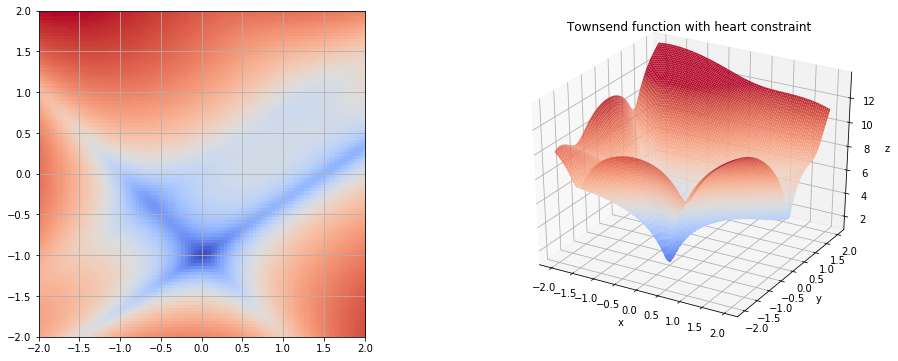

In [4]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(1,2,1)
ax.grid()
ax.imshow(np.log(fv),cmap=cm.coolwarm,extent=(-2,2,-2,2),origin='bottom')

ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.plot_surface(xv, yv, np.log(fv), rstride=1, cstride=1,
                cmap=cm.coolwarm, edgecolor='none',
                vmin = 0, vmax = 12)

ax2.set_title('Townsend function with heart constraint');
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
plt.show()

For the use of GPyOpt library, one need to define the domain in to dimensions, corresponding to $[-2,2] \times [-2,2]$, which initializes the GPyOpt Design_space variable. The initial choice of points is done via the initial_design function, according to a random sampling. Then the function, in this case the Goldstein-Price function, is evaluated in those points.

In [5]:
domain = [{'name': 'var1', 'type': 'continuous', 'domain': (-2,2)},
          {'name': 'var2', 'type': 'continuous', 'domain': (-2,2)}]

space    = GPyOpt.Design_space(domain)

num_init = 10
typ_init = 'random'
X_init = initial_design(typ_init,space,num_init)

Y_init = f(X_init[:,0],X_init[:,1])
Y_init = Y_init[:,np.newaxis]

The main external loop is executed using the BayesianOptimization object, initialized with the interpolation method of usual Gaussian Process, the acquisition function is the Expected Improvement, and jitter = $0$ for a standard Bayesian Optimization loop.

In [6]:
count = 0

max_iter = 100 - num_init
X_step = X_init
Y_step = Y_init

while count < max_iter:
    bo_step = GPyOpt.methods.BayesianOptimization(f = None, domain = domain, X = X_step, Y = Y_step, 
                                                  model_type='GP', acquisition_type='EI',jitter=0)
    
    x_next = bo_step.suggest_next_locations()
    y_next = f(x_next[:,0],x_next[:,1]) 
    
    X_step = np.vstack((X_step,x_next))
    Y_step = np.vstack((Y_step,y_next))
    
    count += 1

Plotting the heatmap of the Goldstein-Price function against the scatterplot of the queried points, one obtains the pciture below:

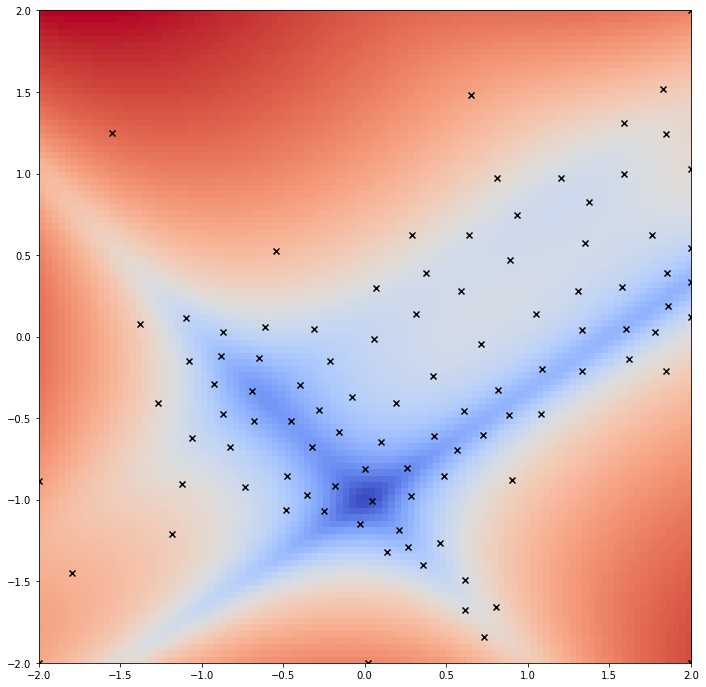

In [7]:
fig = plt.figure(figsize = (12,12))

plt.imshow(np.log(fv),cmap=cm.coolwarm,extent=(-2,2,-2,2),origin='bottom')
plt.scatter(X_step[:,0],X_step[:,1],marker='x',color='black')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

The summary of the results of the optimizaton:

In [8]:
print("Point step where minimium was found: ",np.argmin(Y_step))
print("Value of the exact global minimum: ",goldstein_price(0,-1)[0])
print("Value of the found global minimium: ",Y_step[np.argmin(Y_step)][0])
print("Position of the foun minimium: ",X_step[np.argmin(Y_step)]," vs ",np.array([0.0,-1]))

Point step where minimium was found:  28
Value of the exact global minimum:  3
Value of the found global minimium:  3.660835191730101
Position of the foun minimium:  [ 0.04679311 -1.00490517]  vs  [ 0. -1.]
